In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('C:/Users/sumit/Sumit DATA/Datasets/Project/crime.csv',encoding = 'unicode_escape',header=0)

In [3]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,02-09-2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,21-08-2018 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,03-09-2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,03-09-2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,03-09-2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,05-06-2016 17:25,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,09-07-2015 13:38,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,09-07-2015 13:38,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,31-05-2016 19:35,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [4]:
df.index

RangeIndex(start=0, stop=319073, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 28.0+ MB


In [6]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [7]:
df.drop(['SHOOTING','Location','OCCURRED_ON_DATE'],axis = 1,inplace=True)

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296573 entries, 0 to 319072
Data columns (total 14 columns):
INCIDENT_NUMBER        296573 non-null object
OFFENSE_CODE           296573 non-null int64
OFFENSE_CODE_GROUP     296573 non-null object
OFFENSE_DESCRIPTION    296573 non-null object
DISTRICT               296573 non-null object
REPORTING_AREA         296573 non-null object
YEAR                   296573 non-null int64
MONTH                  296573 non-null int64
DAY_OF_WEEK            296573 non-null object
HOUR                   296573 non-null int64
UCR_PART               296573 non-null object
STREET                 296573 non-null object
Lat                    296573 non-null float64
Long                   296573 non-null float64
dtypes: float64(2), int64(4), object(8)
memory usage: 24.9+ MB


In [10]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361


In [11]:
for i in df:
    print('%s = %d'%(i,df[i].nunique()))

INCIDENT_NUMBER = 263198
OFFENSE_CODE = 216
OFFENSE_CODE_GROUP = 63
OFFENSE_DESCRIPTION = 236
DISTRICT = 12
REPORTING_AREA = 879
YEAR = 4
MONTH = 12
DAY_OF_WEEK = 7
HOUR = 24
UCR_PART = 4
STREET = 3872
Lat = 17763
Long = 17761


## Inference :- 

Unique Count of all categories or nominals from all the columns.

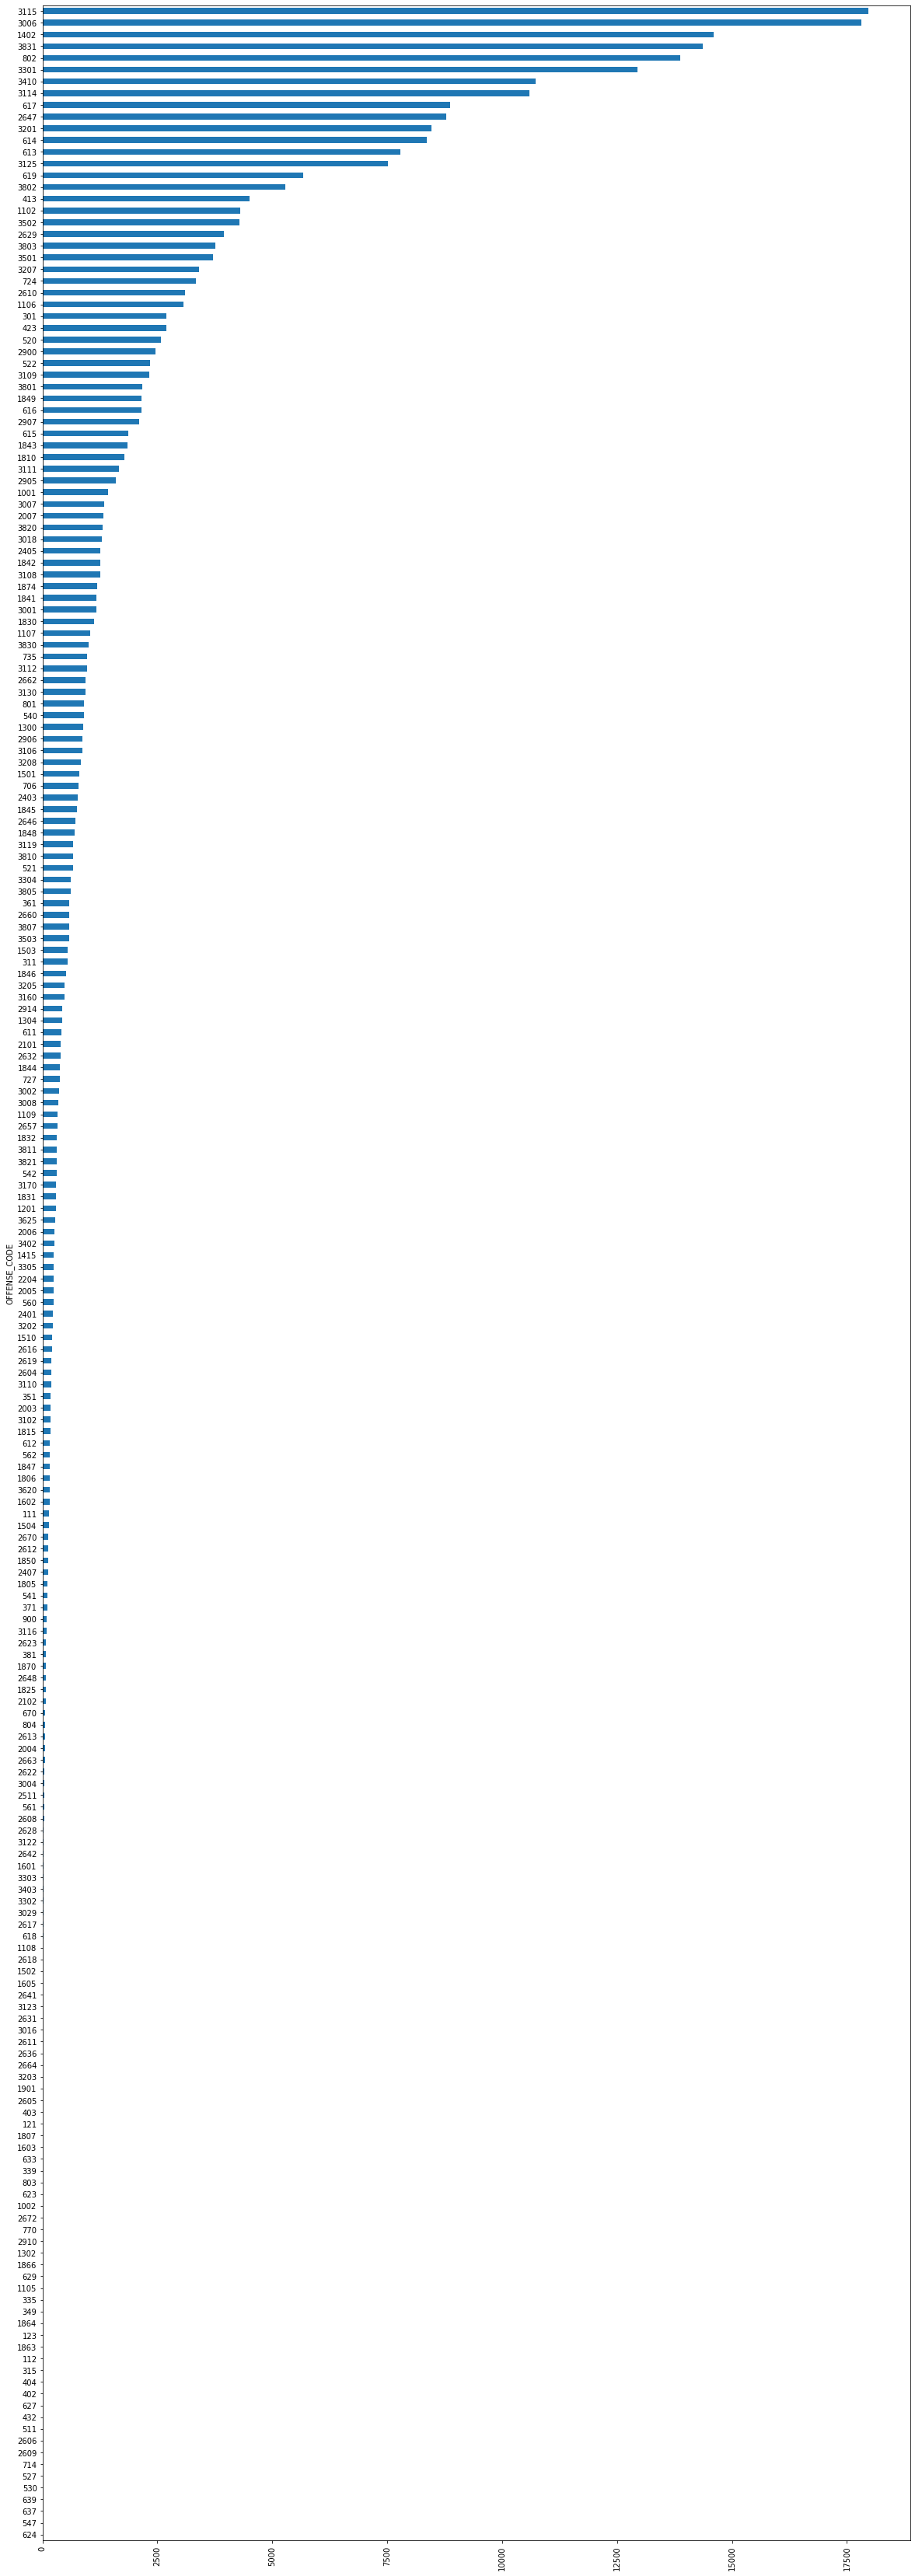

In [12]:
plt.figure(figsize=(20,60))
df.groupby('OFFENSE_CODE').count()['MONTH'].nsmallest(216).plot(kind= 'barh')
plt.xticks(rotation = 90)
plt.show()

## Inference :- 

Above bar plot says that the most repeated or most registered crime is Offence code '3115' i.e - 'INVESTIGATE PERSON' crime followed with offence code '3006' i.e - 'SICK/INJURED/MEDICAL - PERSON'

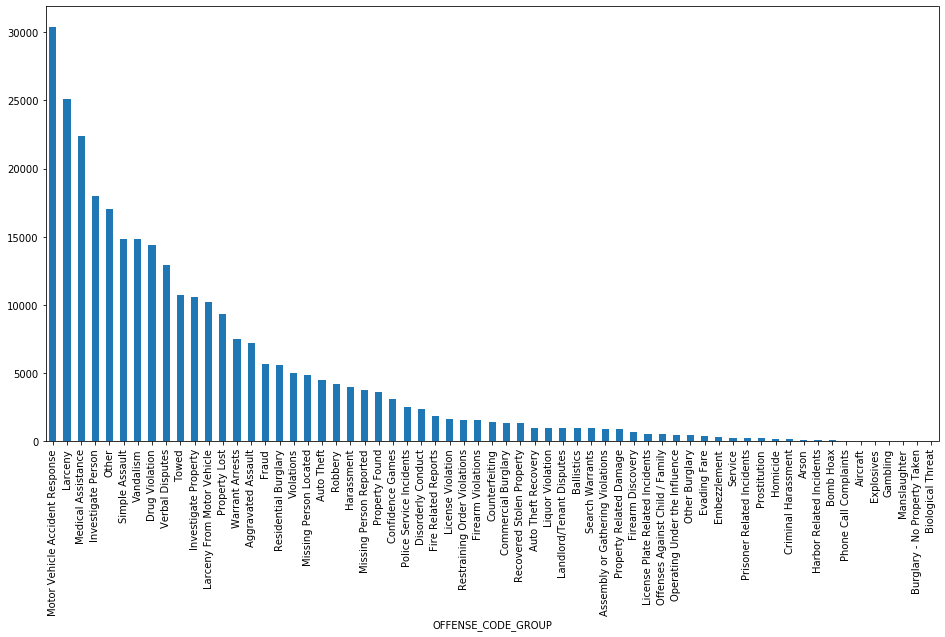

In [13]:
plt.figure(figsize=(16,8))
df.groupby('OFFENSE_CODE_GROUP').count()['MONTH'].nlargest(216).plot(kind= 'bar')
plt.xticks(rotation = 90)
plt.show()

## Inference :- 

Above bar plot says that the most happening Offence code group is Motor Vehicle Accident Response followed with Larceny followed with Larceny means unlawful taking of the personal property of another person or business.

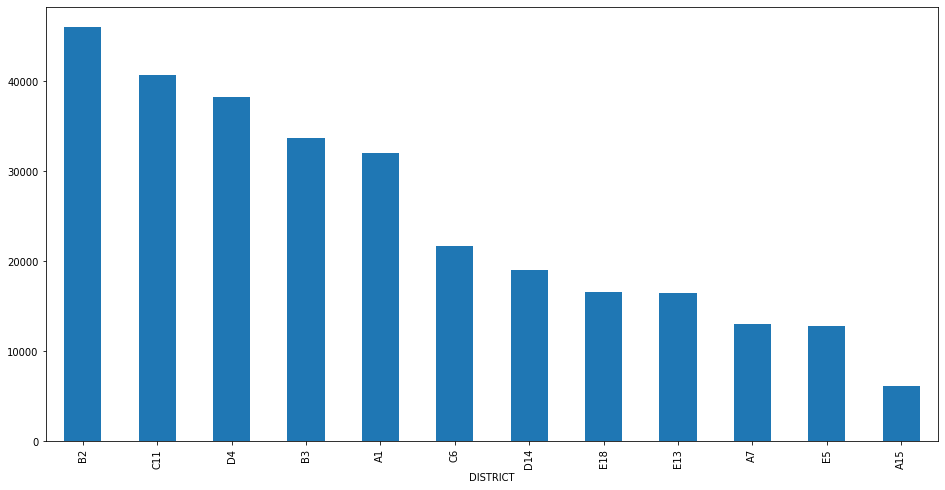

In [14]:
plt.figure(figsize=(16,8))
df.groupby('DISTRICT').count()['OFFENSE_CODE'].nlargest(20).plot(kind= 'bar')
plt.xticks(rotation = 90)
plt.show()

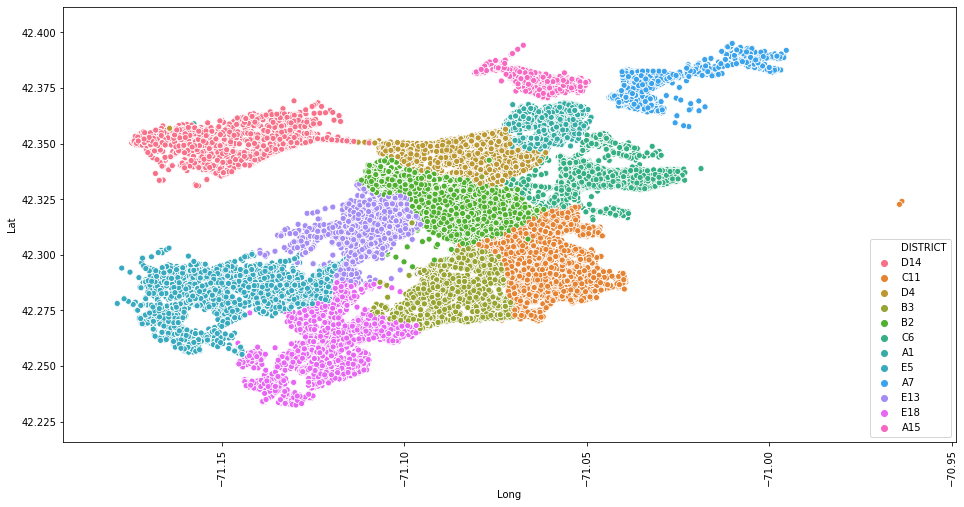

In [15]:
clean = df[(df['Lat']>35) | (df['Long']>35)]
plt.figure(figsize=(16,8))
sns.scatterplot(y = 'Lat', x = 'Long',hue = 'DISTRICT', data = clean)
plt.xticks(rotation = 90)
plt.show()

## Inference :- 

Above barplot and Scatterplot says that the most crime of boston happens in B2 District. This is happening maybe because B2 district belongs to the centre of Boston. It can be the most populated districts of Boston. And another inference is that the lowest crime is in A15 district. This may be because that district is in small in area and is in outer periphery of boston.  

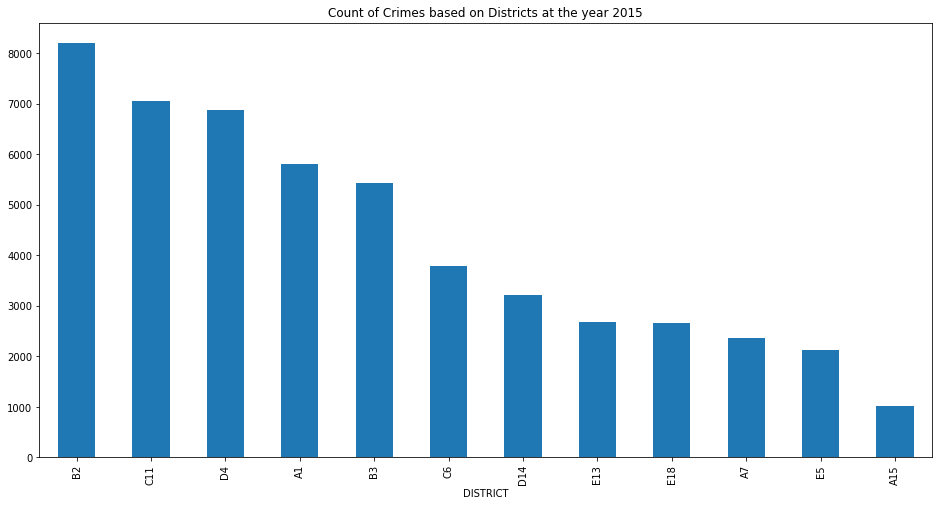

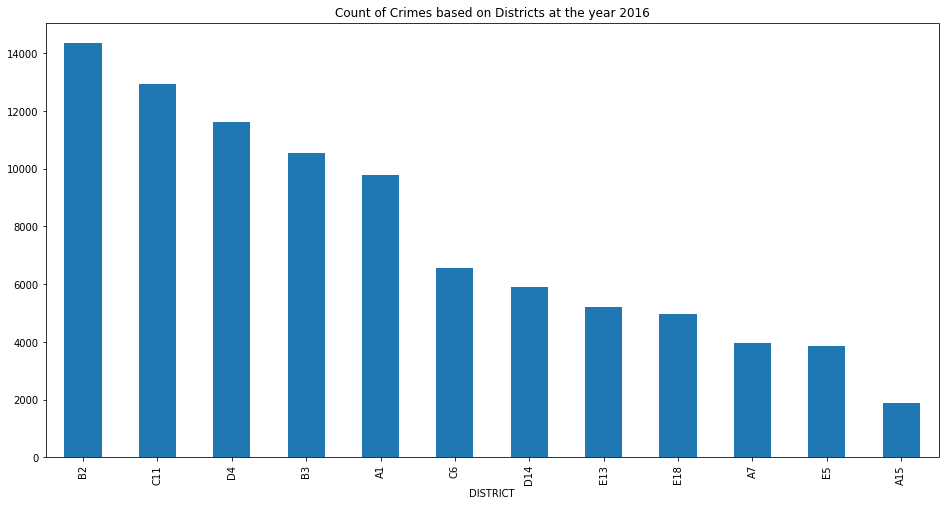

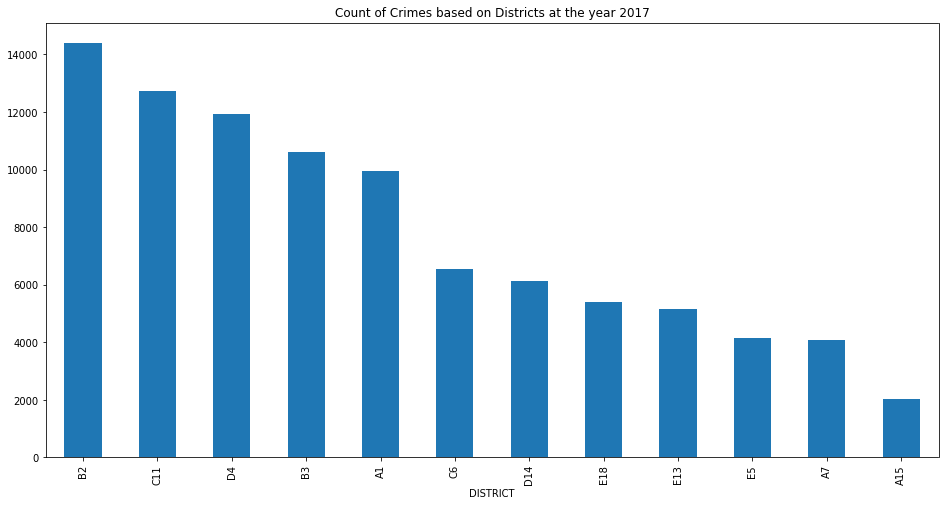

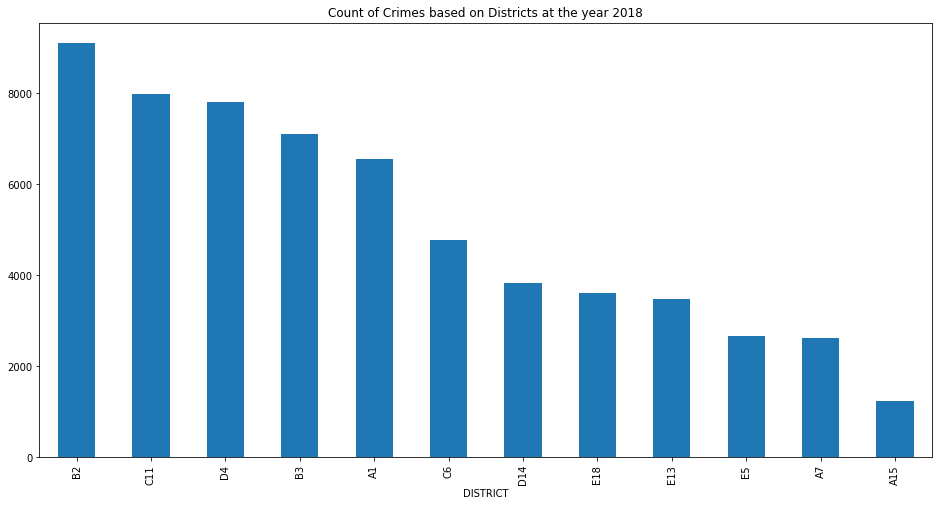

In [16]:
plt.figure(figsize=(16,8))
df[df['YEAR']==2015].groupby('DISTRICT').count()['OFFENSE_CODE'].nlargest(20).plot(kind= 'bar')
plt.title('Count of Crimes based on Districts at the year 2015')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2016].groupby('DISTRICT').count()['OFFENSE_CODE'].nlargest(20).plot(kind= 'bar')
plt.title('Count of Crimes based on Districts at the year 2016')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2017].groupby('DISTRICT').count()['OFFENSE_CODE'].nlargest(20).plot(kind= 'bar')
plt.title('Count of Crimes based on Districts at the year 2017')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2018].groupby('DISTRICT').count()['OFFENSE_CODE'].nlargest(20).plot(kind= 'bar')
plt.title('Count of Crimes based on Districts at the year 2018')
plt.xticks(rotation = 90)
plt.show()

In [17]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361


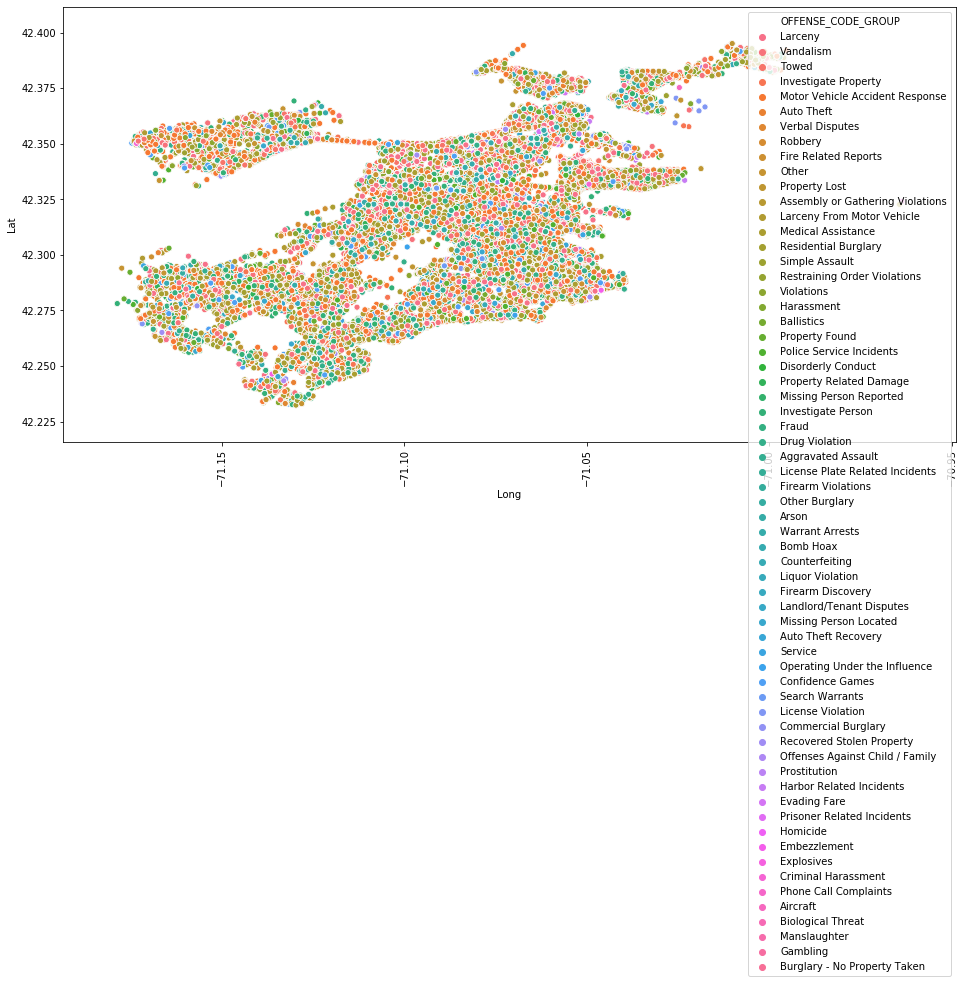

In [18]:
clean = df[(df['Lat']>35) | (df['Long']>35)]
plt.figure(figsize=(16,8))
sns.scatterplot(y = 'Lat', x = 'Long',hue = 'OFFENSE_CODE_GROUP', data = clean)
plt.xticks(rotation = 90)
plt.show()

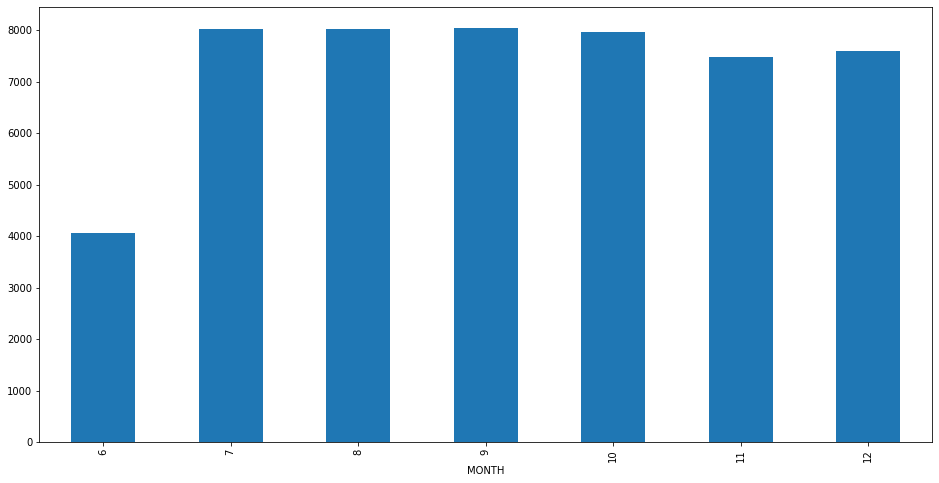

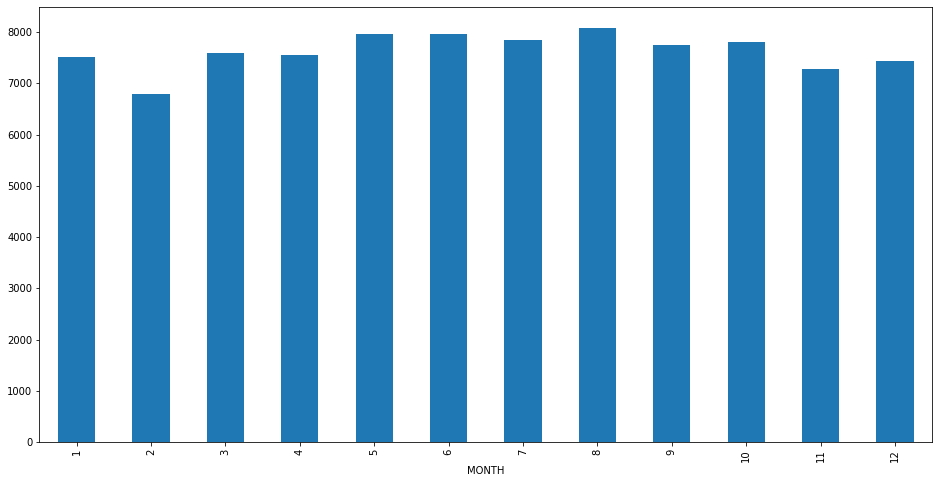

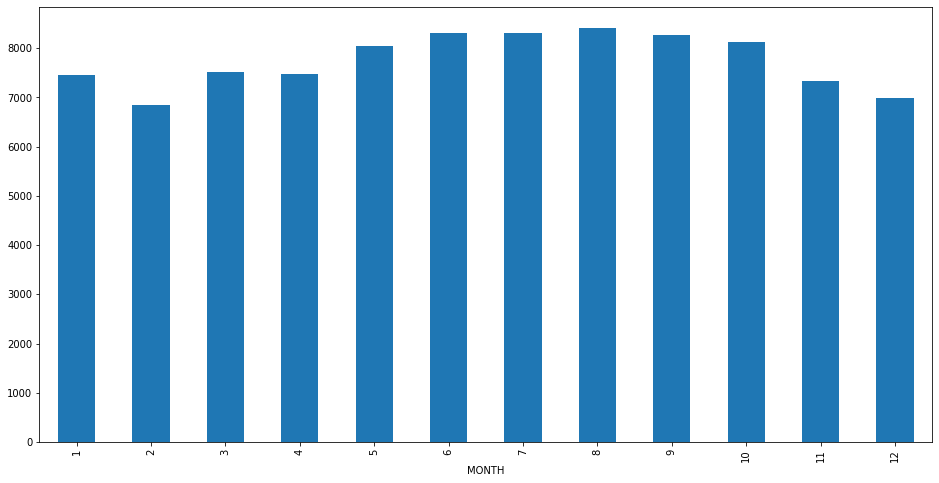

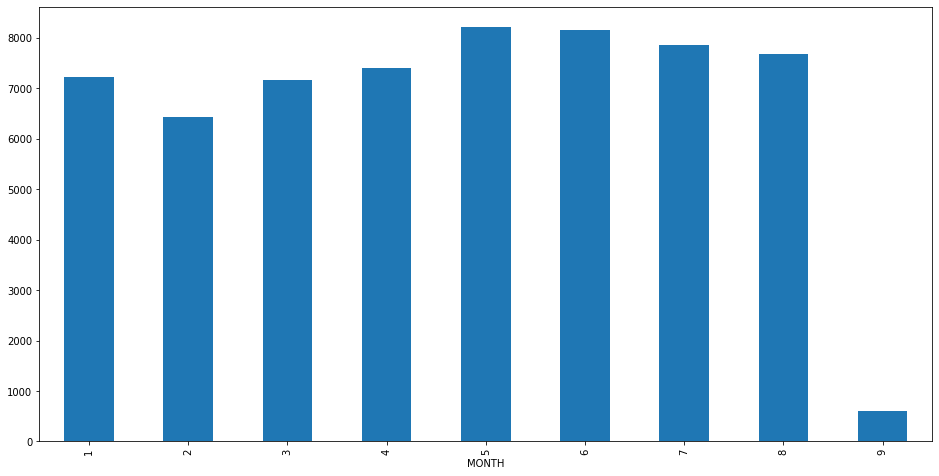

In [19]:
plt.figure(figsize=(16,8))
df[df['YEAR']==2015].groupby('MONTH').count()['OFFENSE_CODE_GROUP'].plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2016].groupby('MONTH').count()['OFFENSE_CODE_GROUP'].plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2017].groupby('MONTH').count()['OFFENSE_CODE_GROUP'].plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(16,8))
df[df['YEAR']==2018].groupby('MONTH').count()['OFFENSE_CODE_GROUP'].plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

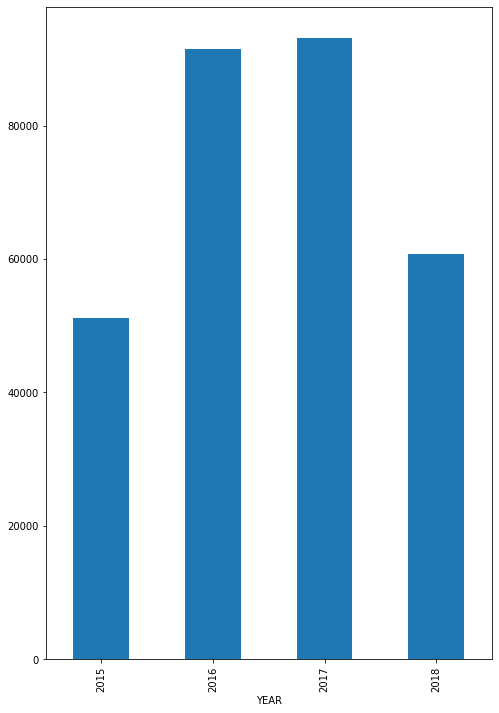

In [26]:
plt.figure(figsize=(8,12))
df.groupby('YEAR').count()['OFFENSE_CODE'].plot(kind = 'bar')
plt.show()

In [20]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long'],
      dtype='object')

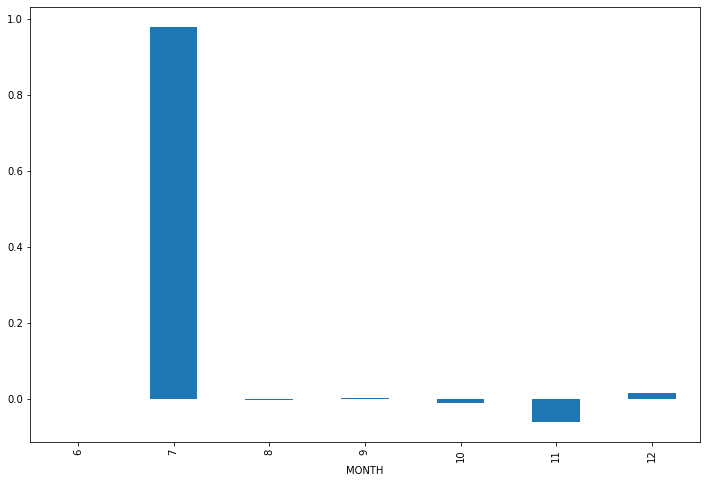

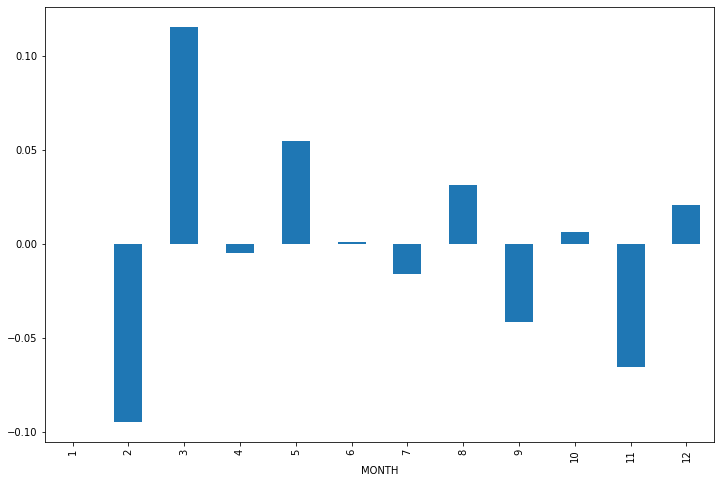

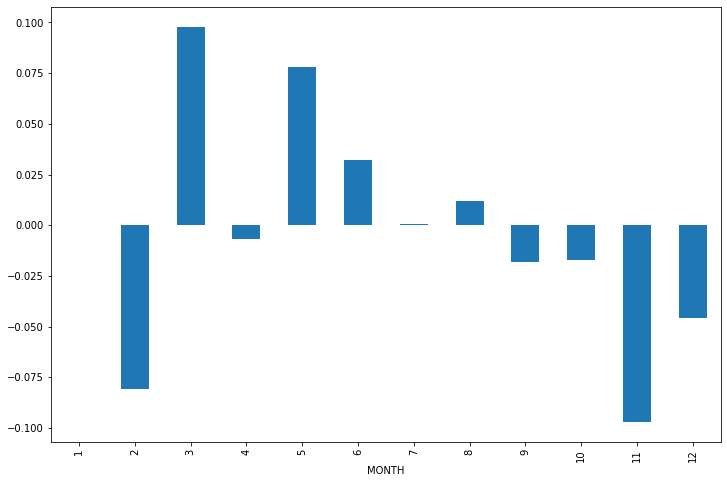

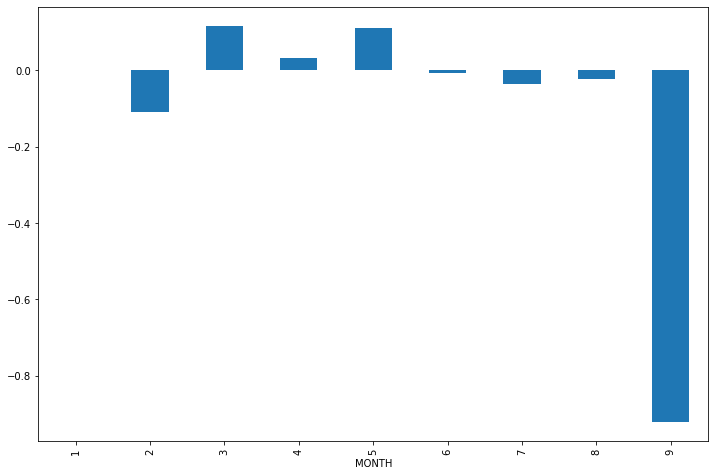

In [37]:
for i in range(2015,2019):
    plt.figure(figsize=(12,8))
    df[df['YEAR']==i].groupby('MONTH').count()['OFFENSE_CODE'].pct_change().plot(kind = 'bar')
    plt.show()